딥러닝 모델은 레이어들의 컴비네이션

loss function이 minimize 되는 쪽으로 어떻게 learning 할 것인가가 optimizer다.

레이어는 인풋 사이즈와 아웃풋 사이즈가 중요하다.

In [38]:
from keras import layers
layer=layers.Dense(32,input_shape=(784,))

Using TensorFlow backend.


In [39]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(32))

loss function optimizer 은 learning 할 때 키가 되는것

loss function(-logliklihood를 많이 씀, )

binary cross entropy는 2 class 분류 문제,

categorical cross entropy는 many-class classification problem,

mse는 회귀문제에서 쓰임

keras의 장점은 cpu/gpu 이용 둘 다 같은 코드를 이용한다.

사용하기 편하다.

CNN,RNN 빌트인이 잘 구축 되어 있다.

상업적인 프로젝트에서도 쓸 수 있다.

### IMDB datasets

In [1]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [2]:
#read the data
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data,test_labels) = imdb.load_data(
num_words=10000)# 가장 많이 사용하는 만개의 단어를 포함시키겠다.

#decode a review
word_index=imdb.get_word_index()# 딕셔너리
reverse_word_index=dict(
[(value,key) for (key,value) in word_index.items()])
decoded_review =' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])# 해당 아이템이 있으면 리버스 없으면 물음표

In [3]:
train_data[0]  #0과 10000사이가 될 것

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0] #positive or negative

1

In [5]:
max([max(sequence) for sequence in train_data]) #0부터 9999까지 만개

9999

In [6]:
word_index=imdb.get_word_index()

In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
reverse_word_index=dict(
[(value,key) for (key,value) in word_index.items()])

In [9]:
[(value,key) for (key,value) in word_index.items()]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling'),
 (52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's"),
 (25242, 'rickman'),
 (6746, 'arranged'),
 (52014, 'rumbustious'),
 (52015, 'familiarness'),
 (52016, "spider'"),
 (68804, 'hahahah'),
 (52017, "wood'"),
 (40833, 'transvestism'),
 (34702, "hangin'"),
 (2338, 'bringing'),
 (40834, 'seamier'),
 (34703, 'wooded'),
 (52018, 'bravora'),
 (16817, 'grueling'),
 (1636, 'wooden'),
 (16818, 'wednesday'),
 (52019, "'prix"),
 (34704, 'altagracia'),
 (52020, 'circuitry'),
 (11585, 'crotch'),
 (57766, 'busybody'),
 (52021, "tart'n'tangy"),
 (14129, 'burgade'),
 (52023, 'thrace'),
 (11038, "tom's"),
 (52025, 'snuggles'),
 (29114, 'francesco'),

In [10]:
[reverse_word_index.get(i - 3, '?') for i in train_data[0]]

#i-3 해준 이유는 10000을 넘는 수를 0,1,2에 배치한 것으로 생각됨
# 그런 애들은 ? 로 가는 걸로

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [11]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000): #있으면 1 없으면 0 
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): #sequence는 리스트, 
        results[i,sequence]=1.
    return results

X_train = vectorize_sequences(train_data)
X_test= vectorize_sequences(test_data)




In [14]:
for i, sequence in enumerate(['Andy','Tom','Max']):
    print(i,sequence)

0 Andy
1 Tom
2 Max


### Vectorize labels

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32') #float으로 바꿔주는것

In [16]:
train_labels[:5]

array([1, 0, 0, 1, 0])

In [17]:
y_train[:3]

array([1., 0., 0.], dtype=float32)

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(1r=0.001)),


SyntaxError: invalid syntax (<ipython-input-20-64a969ff6f81>, line 2)

### Validating our approach

In [21]:
x_val=X_train[:10000]
partial_x_train=X_train[10000:]

y_val=y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.5126 - accuracy: 0.7877 - val_loss: 0.3883 - val_accuracy: 0.8694
Epoch 2/20
15000/15000 [==============================] - 0s 31us/sample - loss: 0.3102 - accuracy: 0.9007 - val_loss: 0.3084 - val_accuracy: 0.8864
Epoch 3/20
15000/15000 [==============================] - 0s 31us/sample - loss: 0.2260 - accuracy: 0.9261 - val_loss: 0.2802 - val_accuracy: 0.8900
Epoch 4/20
15000/15000 [==============================] - 0s 30us/sample - loss: 0.1759 - accuracy: 0.9441 - val_loss: 0.2796 - val_accuracy: 0.8875
Epoch 5/20
15000/15000 [==============================] - 0s 31us/sample - loss: 0.1434 - accuracy: 0.9545 - val_loss: 0.2875 - val_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 0s 31us/sample - loss: 0.1212 - accuracy: 0.9619 - val_loss: 0.2907 - val_accuracy: 0.8876
Epoch 7/20
15000/15000 [==============================] 

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

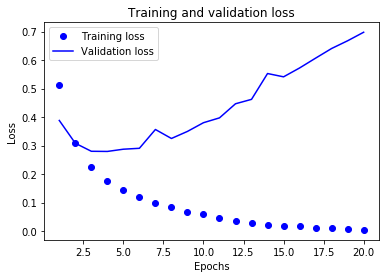

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

validation이 올라가는 순간 오버피팅 신호라고 보고 early stopping으로 조절


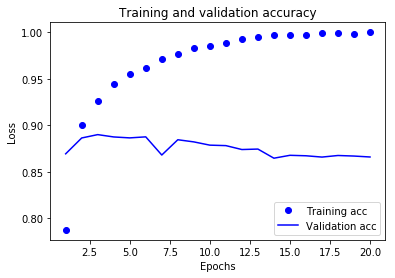

In [25]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Using a trained network to generate predictions on new data

In [34]:
model.predict(X_test)

array([[1.4658322e-03],
       [1.0000000e+00],
       [8.0904102e-01],
       ...,
       [6.3029694e-04],
       [4.4086962e-03],
       [8.9434773e-01]], dtype=float32)

클래스 두 개 일 때는 시그모이드나 소프트 맥스나 결과가 같다. 하지만 소프트맥스 일 때는 compile 할 때 카테고리컬크로스 엔트로피,
시그모이드 일 때는 바이너리크로스엔트로피

Normalize 하는 이유?  

각각 피쳐 별로 분산이 비슷하다 하면 GD 하는 경우 효율적이다.

K-fold validation

정확한 발리데이션은 많은 발리데이션이 필요한데 그건 불가능해서 쓰는것 
